In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [169]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Data Cleaning

In [126]:
print("Dimensions of training data: {}".format(training_data.shape))
print("Dimensions of test data: {}".format(test_data.shape))

Dimensions of training data: (891, 12)
Dimensions of test data: (418, 11)


In [129]:
print training_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [130]:
print training_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [131]:
print training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [132]:
print len(Counter(training_data['Ticket']))

681


We can see that columns Age, Cabin and Embarked contain missing values

In [133]:
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e4a190>]],
      dtype=object)

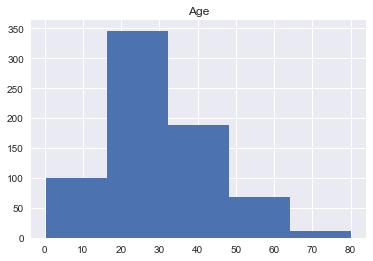

In [134]:
training_data.hist(column='Age', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a852990>]],
      dtype=object)

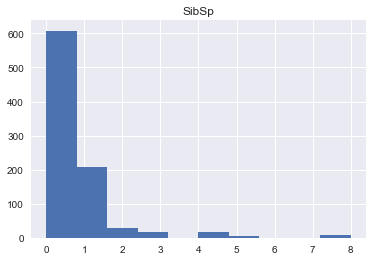

In [135]:
training_data.hist(column='SibSp', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a2a4b90>]],
      dtype=object)

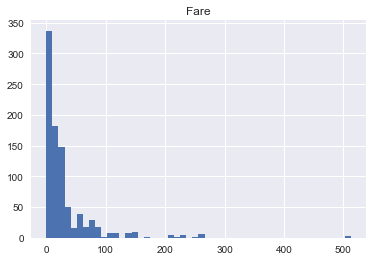

In [17]:
training_data.hist(column='Fare', bins=50)

In [137]:
training_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

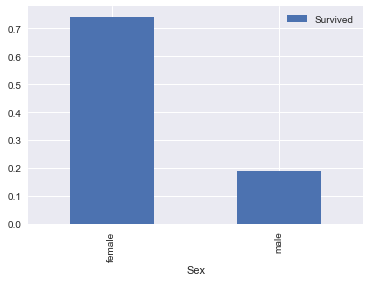

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_pivot = training_data.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

Out of 314, 74% female passengers survived and out of 577, only 19% male passengers survived. 
Therefore, Sex forms an important feature for predicting whether the passenger would survive or not.

In [139]:
training_data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

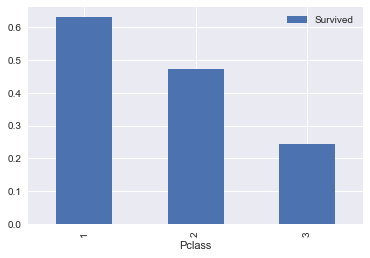

In [140]:
class_pivot = training_data.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

Number of 1st class passengers = 216, 
Number of 2nd class passengers = 184, 
Number of 3rd class passengers = 491

percentage of 1st class passengers that survived = 63%

percentage of 2nd class passengers that survived = 47%

percentage of 3rd class passengers that survived = 24%

Therefore, Pclass is an important feature determining survival of a passenger. 

In [142]:
print training_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


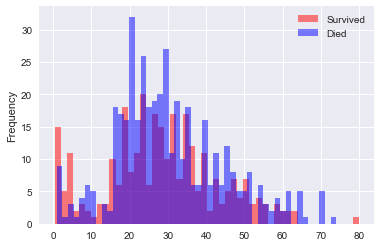

In [143]:
survived = training_data[training_data["Survived"] == 1]
died = training_data[training_data["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

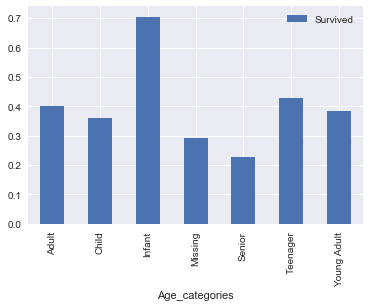

In [146]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(training_data,cut_points,label_names)
test = process_age(test_data,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [147]:
print train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'Age_categories'],
      dtype='object')


In [220]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [148]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train, column)
    test = create_dummies(test, column)

In [153]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'Age_categories', u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Sex_female',
       u'Sex_male', u'Age_categories_Adult', u'Age_categories_Child',
       u'Age_categories_Infant', u'Age_categories_Missing',
       u'Age_categories_Senior', u'Age_categories_Teenager',
       u'Age_categories_Young Adult'],
      dtype='object')

In [221]:
X = train.drop(['Ticket','Cabin','Embarked','Name','Sex','Age_categories','Survived' ], axis=1)

In [222]:
X.columns

Index([u'PassengerId', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Sex_female', u'Sex_male',
       u'Age_categories_Adult', u'Age_categories_Child',
       u'Age_categories_Infant', u'Age_categories_Missing',
       u'Age_categories_Senior', u'Age_categories_Teenager',
       u'Age_categories_Young Adult'],
      dtype='object')

In [223]:
y = train['Survived']

X_test = test.drop(['Ticket','Cabin','Embarked','Name','Sex','Age_categories'], axis=1)

In [224]:
X_test[np.isnan(X_test)] = 0

In [225]:
X_test['Fare'].describe()

count    418.000000
mean      35.541956
std       55.867684
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [226]:
X_test.shape

(418, 18)

In [227]:
model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(model, X, y, cv=10)
scores.sort()
accuracy = scores.mean()
print accuracy

0.8181846555442063


In [228]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)
y_pred = model.predict(X_test)

In [229]:
len(y_pred)

418

In [231]:
submission_ids = X_test['PassengerId']
submission_df = {'PassengerId': submission_ids, 'Survived': y_pred}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission.csv",index=False)